In [1]:
import matplotlib.pyplot as plt
import numpy as np

import json
import glob

from collections import defaultdict
import re

In [11]:
v1_path = "./*_recommendation_output/*/*.json"


prompt_language2experiments = defaultdict(lambda : defaultdict(dict))

for fname in glob.glob(v1_path):
    prompt_language = fname.split("/")[1].split("_")[0]
    experiment_name = int(fname.split("/")[-2].split("_")[1])
    request_number = int(fname.split("/")[-1].split(".")[0].split("_")[-1])
    with open(fname, "r") as f:
        data = json.load(f)
        prompt_language2experiments[prompt_language][experiment_name][request_number] = data

In [12]:
prompt_language2experiments["turkish"][0][0]

{'request_id': 'request_0',
 'request': {'entity': 'movies', 'genre': 'Docu', 'request_id': 'request_0'},
 'recommendations': [{'name': 'Free Solo',
   'language': 'İngilizce',
   'country': 'ABD',
   'genre': 'Belgesel, Spor'},
  {'name': 'Icarus',
   'language': 'İngilizce, Rusça',
   'country': 'ABD',
   'genre': 'Belgesel, Spor, Gerilim'},
  {'name': 'Amy',
   'language': 'İngilizce',
   'country': 'Birleşik Krallık',
   'genre': 'Belgesel, Biyografi, Müzik'},
  {'name': 'Citizenfour',
   'language': 'İngilizce',
   'country': 'ABD, Almanya, Birleşik Krallık',
   'genre': 'Belgesel, Biyografi, Haber'},
  {'name': 'The Act of Killing',
   'language': 'Endonezyaca, İngilizce',
   'country': 'Danimarka, Norveç, Birleşik Krallık',
   'genre': 'Belgesel, Suç, Tarih'},
  {'name': 'Man with a Movie Camera',
   'language': 'Sessiz',
   'country': 'Sovyetler Birliği',
   'genre': 'Belgesel, Deneysel'},
  {'name': 'Searching for Sugar Man',
   'language': 'İngilizce, Afrikaans',
   'country'

In [6]:
import pycountry

manual_map = {
    "USA": "United States",
    "UK": "United Kingdom",
    "USSR": "Soviet Union",
    "West Germany": "Germany",
    "South Korea": "Korea, Republic of",
    "North Macedonia": "North Macedonia",
    "South Africa": "South Africa",
    "Hong Kong": "Hong Kong SAR China"
}

persian_2_english_country_map = {
    "ایران": "Iran",
    "افغانستان": "Afghanistan",
    "پاکستان": "Pakistan",
    "عراق": "Iraq",
    "ترکیه": "Turkey",
    "سوریه": "Syria",
    "عربستان سعودی": "Saudi Arabia",
    "مصر": "Egypt",
    "اردن": "Jordan",
    "لبنان": "Lebanon",
    "امارات متحده عربی": "United Arab Emirates",
    "کویت": "Kuwait",
    "قطر": "Qatar",
    "بحرین": "Bahrain",
    "عمان": "Oman",
    "یمن": "Yemen",
    "لیبی": "Libya",
    "ایالات متحده آمریکا": "United States",
    "آلمان": "Germany",

}

def normalize_country(name):
    if name in manual_map:
        if name in persian_2_english_country_map:
            name = persian_2_english_country_map[name]
        return manual_map[name]
    try:
        return pycountry.countries.lookup(name).name
    except LookupError:
        return name

In [5]:
lang_mapper = {
    'ژاپنی': 'japanese',
    'اسپانیایی': 'spanish',
    'آلمانی': 'german',
    'آلمانی، انگلیسی': 'german, english',
    'انگلیسی': 'english',
    'ایتالیایی': 'italian',
    'فرانسوی': 'french',
    'روسی': 'russian',
    'چینی': 'chinese',
    'کره‌ای': 'korean',
    'عربی': 'arabic',
    'ترکی': 'turkish',
    'پرتغالی': 'portuguese',
    'هندی': 'hindi',
    'بنگالی': 'bengali',
    'اردو': 'urdu',
    'تایلندی': 'thai',
    'ویتنامی': 'vietnamese',
    'مالایی': 'malay',
    'فیلیپینی': 'filipino',
    'سوئدی': 'swedish',
    'نروژی': 'norwegian',
    'دانمارکی': 'danish',
    'هلندی': 'dutch',
    'فنلاندی': 'finnish',
    'پولندی': 'polish',
    'چکی': 'czech',
    'رومانیایی': 'romanian',
    'بلغاری': 'bulgarian',
    'اسلواکی': 'slovak',
    'اسلونیایی': 'slovenian',
    'مجارستانی': 'hungarian',
    'کریول هائیتی': 'haitian creole',  
    "بدون دیالوگ": "no dialogue",
    "اندونزیایی": "indonesian",
    "فارسی": "persian",
    "کره ای": "korean",
    "none (silent)": "no dialogue",
    "russian (silent)": "no dialogue",
    "عبری": "hebrew",
    "لهستانی": "estonian",
    "استونیایی": "estonian",
    "ارمنی": "armenian",
 
    'İngilizce': 'english',
    'Rusça': 'russian',
    'Endonezyaca': 'indonesian',
    'Endonezce': 'indonesian', 
    'Japonca': 'japanese',
    'Afrikaans': 'afrikaans',
    'Sessiz': 'no dialogue',
    'Yok (Sessiz)': 'no dialogue',
    "almanca": "german",
    "fransızca": "french",
    "İspanyolca": "spanish",
    "İtalyanca": "italian",
    "İsveççe": "swedish",
    "İsveç": "swedish",
    "İsveççe": "swedish",
    "rusça (sessiz)": "no dialogue",
    'afrikaans': 'afrikaans',
    'afrikanca': 'afrikaans',
    'latince': 'latin',
    'i̇branice': 'hebrew',
    "korece": "korean",
    "türkçe": "turkish",
    'çince': 'chinese',
    'i̇sveçce': 'swedish',
    'i̇sveç': 'swedish',
    'sessiz film (ara yazılar i̇ngilizce)': 'no dialogue',
    'kantonca': 'chinese',
    "portekizce": "portuguese",
    "isixhosa": "xhosa",
    "afrikaanca": "afrikaans",
    "isizulu": "zulu",
    "lehçe": "polish",
    "sicilyaca": "sicilian",

    'sindarin': 'sindarin',          # fictional language (Tolkien)
    'mandarin': 'mandarin',
    'cantonese': 'cantonese',
    'spanish': 'spanish',
    'coreano': 'korean',             # Italian/Spanish
    'english': 'english',
    'italiano': 'italian',           # Italian
    'afrikaans': 'afrikaans',
    'silent': 'no dialogue',
    'polacco': 'polish',             # Italian
    'indonesian': 'indonesian',
    'inglese': 'english',            # Italian
    'none': 'no dialogue',           # Treat as no dialogue
    'japanese': 'japanese',
    'persiano': 'persian',           # Italian
    'russian': 'russian',
    'french': 'french',
    'spagnolo': 'spanish',           # Italian
    'giapponese': 'japanese',        # Italian
    'francese': 'french',            # Italian
    'italian': 'italian',
    'tedesco': 'german',             # Italian
    'german': 'german',
    'korean': 'korean',
    'swedish': 'swedish',
    'danese': 'danish',              # Italian
    'ebraico': 'hebrew',             # Italian
    'macedonian': 'macedonian',
    "farsça": "persian",
    'afrikaans': 'afrikaans',
    'arabic': 'arabic', 'arabo': 'arabic', 'arapça': 'arabic', 'عربی لبنانی': 'arabic',
    'bahasa indonesia': 'indonesian', 'indonesian': 'indonesian',
    'cantonese': 'cantonese',
    'chinese': 'chinese', 'چینی ماندارین': 'mandarin', 'mandarin': 'mandarin',
    'mandarin chinese': 'mandarin', 'mandarin çincesi': 'mandarin', 'mandarino': 'mandarin',
    'czech': 'czech', 'çekçe': 'czech',
    'danca': 'danish', 'danish': 'danish',
    'dari': 'dari',
    'dutch': 'dutch', 'felemenkçe': 'dutch',
    'english': 'english', 'english (silent)': 'no dialogue', 'eski i̇ngilizce': 'english',
    'farsi': 'persian', 'persian': 'persian',
    'fransızca (altyazılı)': 'french', 'francese': 'french', 'فرانسوی (با حداقل دیالوگ)': 'french',
    'french': 'french',
    'german': 'german',
    'greek': 'greek', 'yunanca': 'greek', 'یونانی': 'greek',
    'hebrew': 'hebrew',
    'hindi': 'hindi', 'hintçe': 'hindi',
    'hokkien': 'hokkien', 'taiwanese hokkien': 'hokkien',
    'hungarian': 'hungarian',
    'italian': 'italian',
    'i̇zlandaca': 'icelandic',
    'japanese': 'japanese',
    'khoisan': 'khoisan', 'khoisan languages': 'khoisan',
    'korean': 'korean',
    'macedonian': 'macedonian', 'makedonca': 'macedonian', 'مقدونی': 'macedonian',
    'norwegian': 'norwegian', 'norveççe': 'norwegian',
    'polish': 'polish',
    'portuguese': 'portuguese',
    'romanian': 'romanian', 'rumence': 'romanian',
    'russian': 'russian',
    'shanghainese': 'shanghainese',
    'spanish': 'spanish',
    'swedish': 'swedish',
    'taiwanese': 'taiwanese',
    'telugu': 'telugu',
    'thai': 'thai',
    'turco': 'turkish', 'turkish': 'turkish', 'ترکی مقدونی': 'turkish',
    'xhosa': 'xhosa',
    'yok (görsel)': 'no dialogue',
    'yucatec maya': 'yucatec maya',
    'silent (english intertitles)': 'no dialogue', 'silent (english title cards)': 'no dialogue',
    'silent (intertitles in russian)': 'no dialogue', 'silent (russian intertitles)': 'no dialogue',
    'no dialogue': 'no dialogue', 'no dialogue (nature sounds)': 'no dialogue',
    'no dialogue (silent)': 'no dialogue', 'sessiz film (ara yazılar)': 'no dialogue',
    'sessiz film (ara yazılarla)': 'no dialogue',
    'بدون دیالوگ (موسیقی و جلوه\u200cهای صوتی)': 'no dialogue',
    'بدون دیالوگ (موسیقی)': 'no dialogue',
    'بدون دیالوگ (میان\u200cنویس)': 'no dialogue',
    'بدون کلام (تصاویر و زیرنویس)': 'no dialogue'


}


def normalize_lang(name):
    if "none" in name:
        print("HEU")
    if name in lang_mapper:
        return lang_mapper[name]
    elif name.lower() in lang_mapper:
        return lang_mapper[name.lower()]
    else:
        return name

In [15]:
prompt_language2counties = dict()
prompt_language2languages = dict()

for prompt_language in prompt_language2experiments:
    request2exp2countries = defaultdict(list)
    request2exp2languages = defaultdict(list)


    for request_number in range(0, 11): # This sets request type static
        req_langs = []
        req_countries = []
        for experiment_number in range(0, 5): # This sets experiment number static
            results = prompt_language2experiments[prompt_language][experiment_number][request_number]
            rec_langs = []
            rec_countries = []
            for rec in results["recommendations"]:
                country = rec["country"]
                lang =  re.split(r'[،,\;\|\:\/]', rec["language"]) 
                lang = list(set([normalize_lang(l.strip()).lower() for l in lang if l.strip()]))
                countries = re.split(r'[،,\;\|\:\/]', country)
                countries = list(set([normalize_country(c.strip()).lower() for c in countries if c.strip()]))
                
                rec_countries.append(countries)
                rec_langs.append(lang)
            
            req_langs.append(rec_langs)
            req_countries.append(rec_countries)

        request2exp2countries[request_number] = req_countries
        request2exp2languages[request_number] = req_langs
    
    prompt_language2counties[prompt_language] = request2exp2countries
    prompt_language2languages[prompt_language] = request2exp2languages

In [16]:
len(prompt_language2counties["english"][0])

5

In [17]:
# prompt lang 2 request 2 experiment 2 countries

prompt_language2req2langs_means = defaultdict(lambda: defaultdict(lambda : defaultdict(float)))
prompt_language2req2langs_stds = defaultdict(lambda: defaultdict(lambda : defaultdict(float)))

for prompt_language in prompt_language2counties:
    for req_number in range(0, 11):
        # There are five experimtns, I want to count the language for each request
        exps = prompt_language2languages[prompt_language][req_number]   
        counts = []
        all_langs = set()
        for exp in exps:
            lang_count = defaultdict(int)
            for lang in exp:
                for l in lang:
                    lang_count[l] += 1
                    all_langs.add(l)
            counts.append(lang_count)
        
        for lang in all_langs:
            lang_counts = [c.get(lang, 0) for c in counts]
            mean = np.mean(lang_counts)
            std = np.std(lang_counts)
            print(f"Language: {lang}, Mean: {mean}, Std: {std}")
            prompt_language2req2langs_means[prompt_language][req_number][lang] = mean
            prompt_language2req2langs_stds[prompt_language][req_number][lang] = std

Language: no dialogue, Mean: 1.0, Std: 0.0
Language: swedish, Mean: 0.2, Std: 0.4000000000000001
Language: german, Mean: 0.4, Std: 0.48989794855663565
Language: french, Mean: 0.4, Std: 0.48989794855663565
Language: english, Mean: 8.6, Std: 0.48989794855663565
Language: indonesian, Mean: 0.8, Std: 0.4
Language: russian, Mean: 1.0, Std: 0.0
Language: japanese, Mean: 0.6, Std: 0.48989794855663565
Language: afrikaans, Mean: 0.6, Std: 0.48989794855663565
Language: german, Mean: 0.2, Std: 0.4
Language: french, Mean: 0.2, Std: 0.4
Language: english, Mean: 8.0, Std: 0.0
Language: indonesian, Mean: 1.0, Std: 0.0
Language: mandarin, Mean: 1.0, Std: 0.0
Language: japanese, Mean: 1.0, Std: 0.0
Language: german, Mean: 1.6, Std: 1.3564659966250538
Language: sicilian, Mean: 0.6, Std: 0.48989794855663565
Language: french, Mean: 0.6, Std: 0.48989794855663565
Language: english, Mean: 8.6, Std: 0.4898979485566356
Language: latin, Mean: 0.6, Std: 0.48989794855663565
Language: italian, Mean: 1.6, Std: 0.48

In [18]:
prompt_language2req2langs_means["english"][0]

defaultdict(float,
            {'no dialogue': np.float64(0.6),
             'macedonian': np.float64(0.6),
             'french': np.float64(0.2),
             'english': np.float64(6.8),
             'indonesian': np.float64(1.0),
             'romanian': np.float64(0.2),
             'russian': np.float64(0.4),
             'japanese': np.float64(0.2)})

In [19]:
prompt_language2req2langs_means["english"][0]

defaultdict(float,
            {'no dialogue': np.float64(0.6),
             'macedonian': np.float64(0.6),
             'french': np.float64(0.2),
             'english': np.float64(6.8),
             'indonesian': np.float64(1.0),
             'romanian': np.float64(0.2),
             'russian': np.float64(0.4),
             'japanese': np.float64(0.2)})

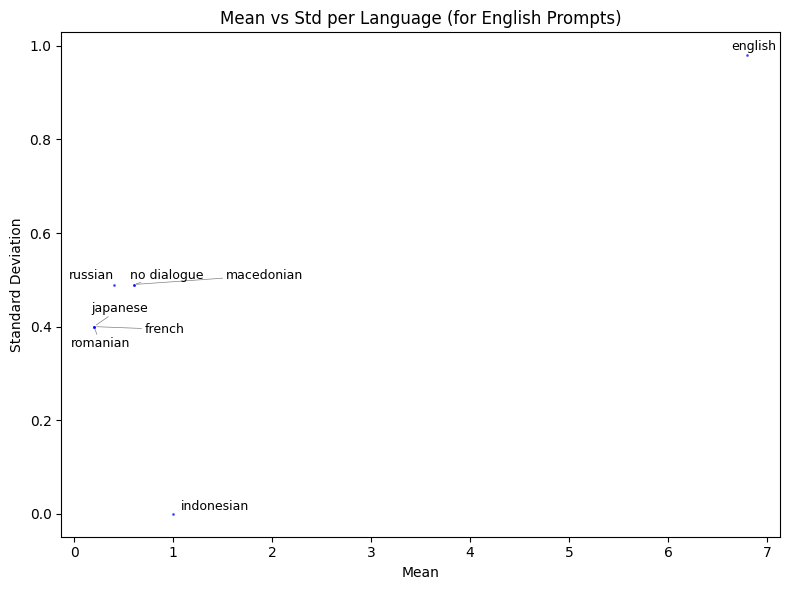

In [20]:
import matplotlib.pyplot as plt
from adjustText import adjust_text


# Get mean and std dictionaries
means = prompt_language2req2langs_means["english"][0]
stds = prompt_language2req2langs_stds["english"][0]

# Align both on common languages
langs = means.keys()
mean_vals = means.values()
std_vals = stds.values()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(mean_vals, std_vals, color='blue', alpha=0.6, s=1)

# # Add labels
texts = []
for lang in langs:
    texts.append(plt.text(means[lang], stds[lang], lang, fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.title("Mean vs Std per Language (for English Prompts)")
# plt.grid(True)
plt.tight_layout()
plt.show()

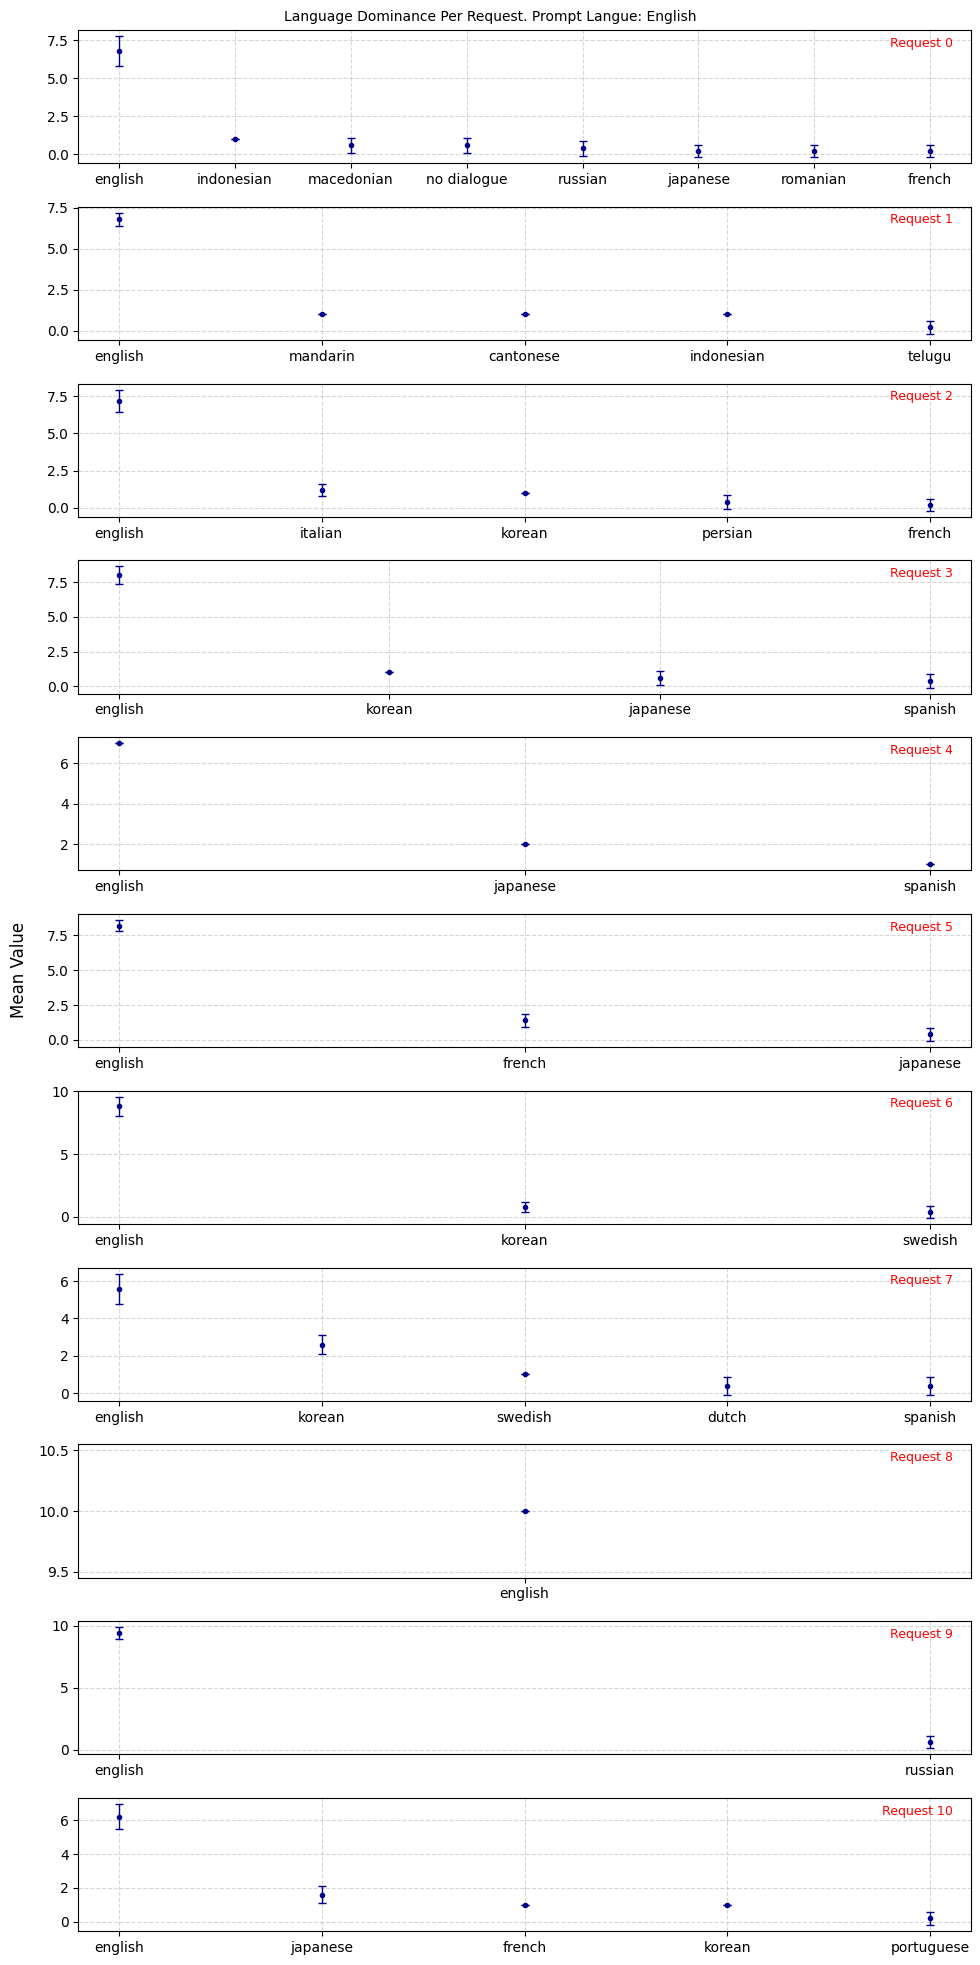

In [21]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(10, 20))

prompt_language = "english"
request_numbers = list(range(11))  # Request numbers from 0 to 10
for i, req_num in enumerate(request_numbers):
    # Get mean and std dictionaries
    means = prompt_language2req2langs_means[prompt_language][i]
    stds = prompt_language2req2langs_stds[prompt_language][i]

    # Align both on common languages
    langs = list(means.keys())
    mean_vals = list(means.values())
    std_vals = list(stds.values())

    # sort them based on mean values
    sorted_indices = np.argsort(list(mean_vals))[::-1]  # Sort in descending order
    langs = [langs[i] for i in sorted_indices] 
    mean_vals = [mean_vals[i] for i in sorted_indices]
    std_vals = [std_vals[i] for i in sorted_indices]


    axs[i].errorbar(langs, mean_vals, yerr=std_vals, fmt='o', capsize=3, color='darkblue', elinewidth=1, markeredgewidth=1, markersize=3)
    # set grid true
    axs[i].grid(True, linestyle='--', alpha=0.5)

    # add request number inside the plot top right corner
    axs[i].text(0.98, 0.95, f"Request {req_num}", transform=axs[i].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right', color='red')


fig.supylabel("Mean Value")
fig.suptitle(f"Language Dominance Per Request. Prompt Langue: {prompt_language.title()}", fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.97)  # Adjust top to make room for the suptitle
plt.show()

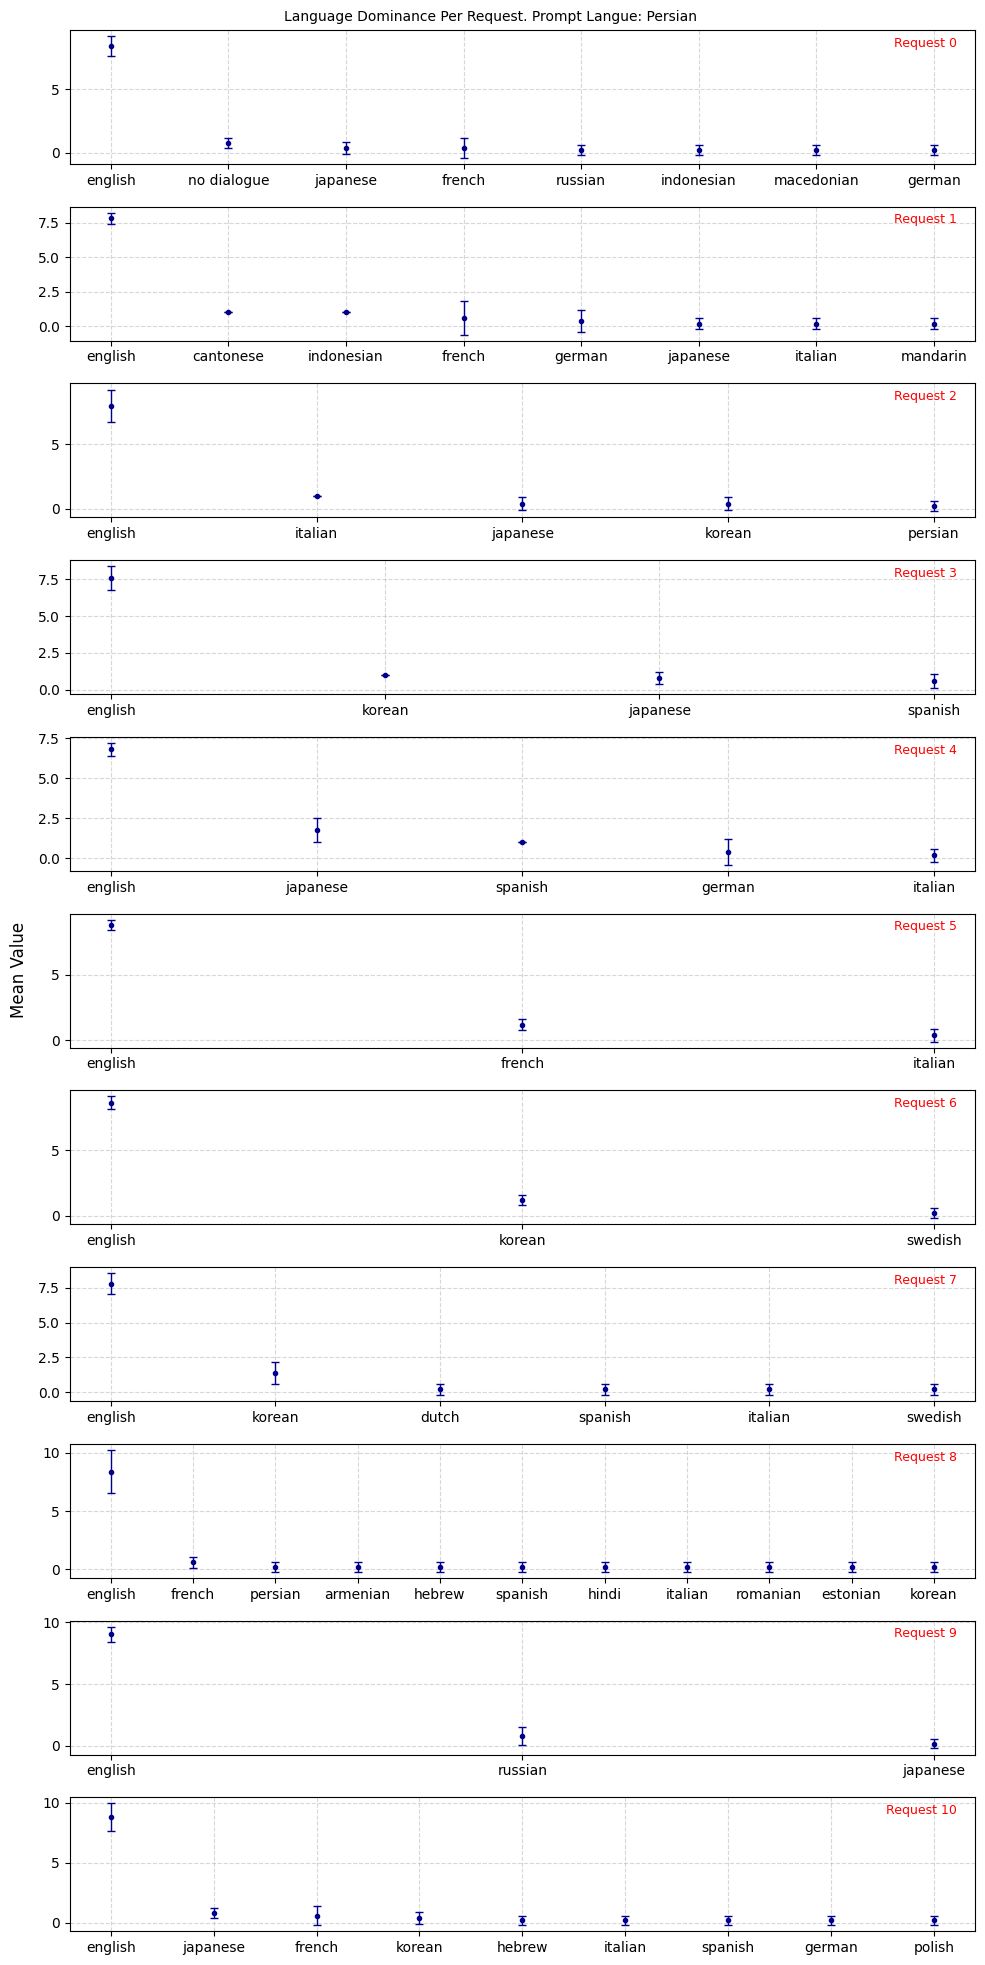

In [22]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(10, 20))

prompt_language = "persian"
request_numbers = list(range(11))  # Request numbers from 0 to 10
for i, req_num in enumerate(request_numbers):
    # Get mean and std dictionaries
    means = prompt_language2req2langs_means[prompt_language][i]
    stds = prompt_language2req2langs_stds[prompt_language][i]

    # Align both on common languages
    langs = list(means.keys())
    mean_vals = list(means.values())
    std_vals = list(stds.values())

    # sort them based on mean values
    sorted_indices = np.argsort(list(mean_vals))[::-1]  # Sort in descending order
    langs = [langs[i] for i in sorted_indices] 
    mean_vals = [mean_vals[i] for i in sorted_indices]
    std_vals = [std_vals[i] for i in sorted_indices]


    axs[i].errorbar(langs, mean_vals, yerr=std_vals, fmt='o', capsize=3, color='darkblue', elinewidth=1, markeredgewidth=1, markersize=3)
    # set grid true
    axs[i].grid(True, linestyle='--', alpha=0.5)

    # add request number inside the plot top right corner
    axs[i].text(0.98, 0.95, f"Request {req_num}", transform=axs[i].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right', color='red')


fig.supylabel("Mean Value")
fig.suptitle(f"Language Dominance Per Request. Prompt Langue: {prompt_language.title()}", fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.97)  # Adjust top to make room for the suptitle
plt.show()

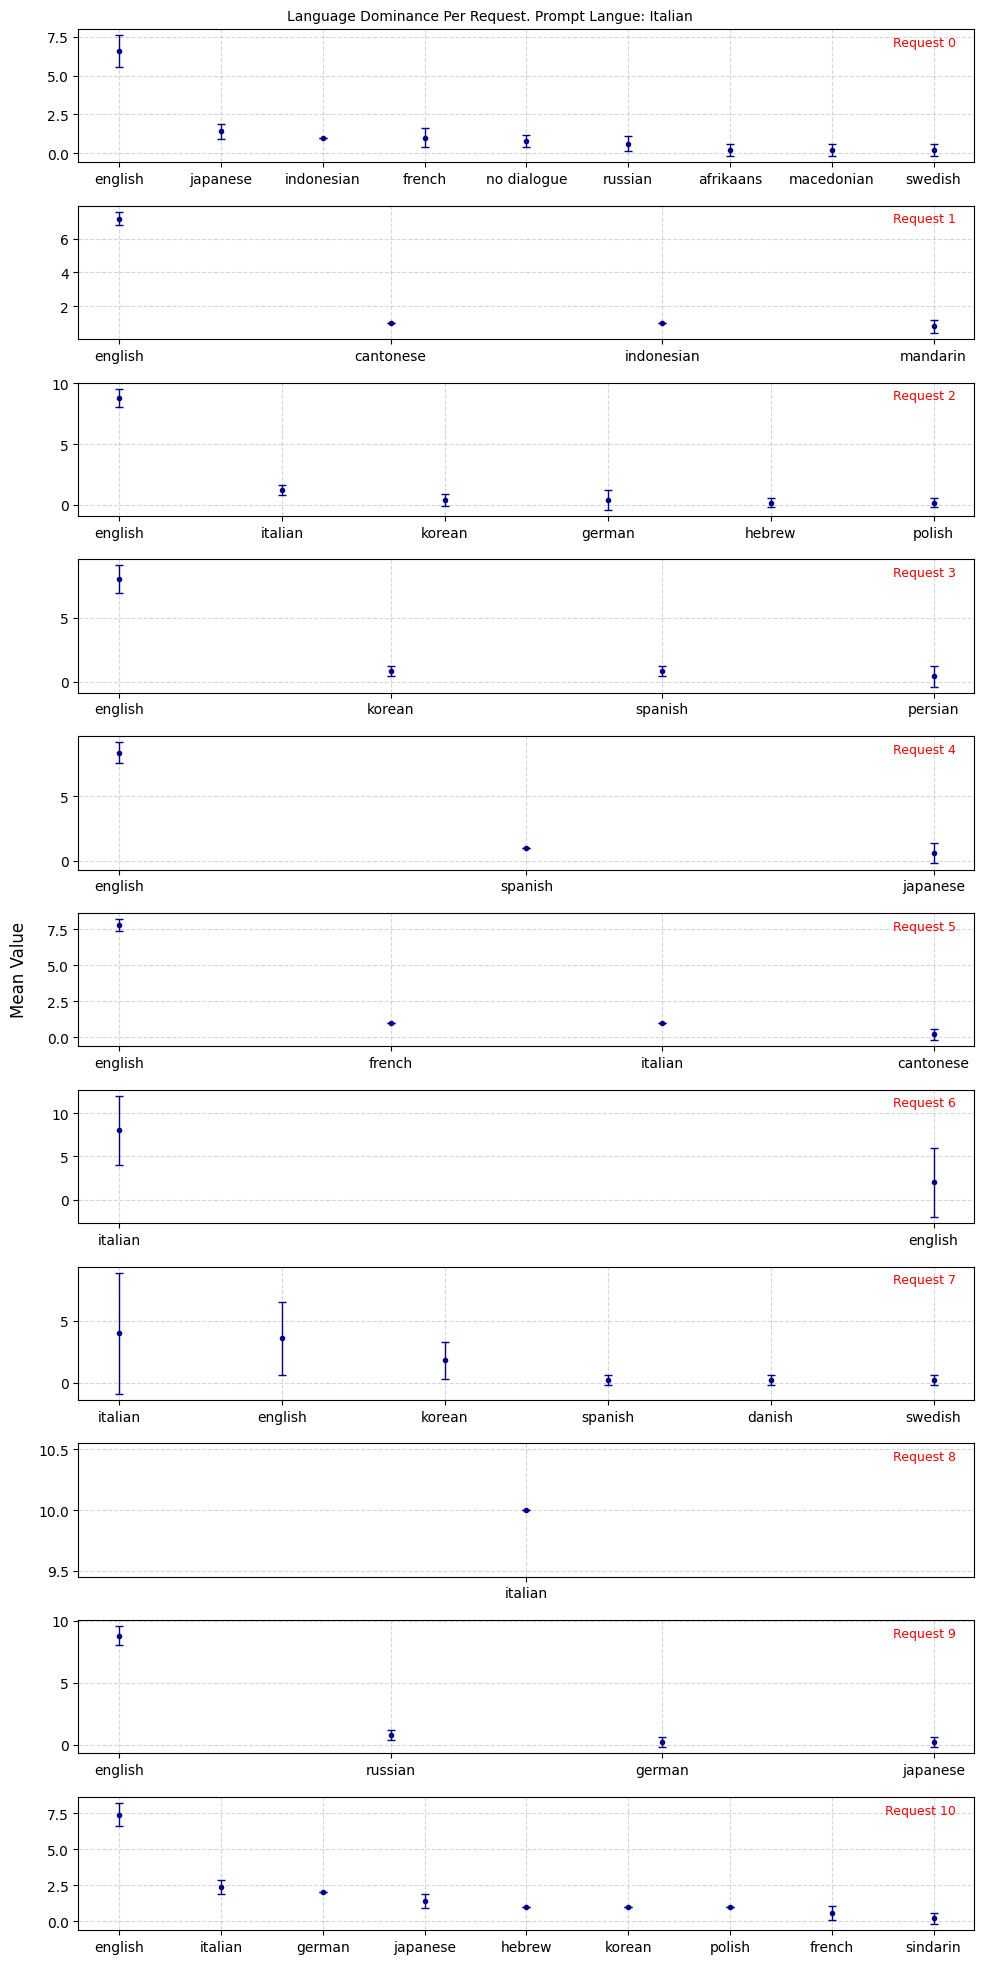

In [29]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(10, 20))

prompt_language = "italian"
request_numbers = list(range(11))  # Request numbers from 0 to 10
for i, req_num in enumerate(request_numbers):
    # Get mean and std dictionaries
    means = prompt_language2req2langs_means[prompt_language][i]
    stds = prompt_language2req2langs_stds[prompt_language][i]

    # Align both on common languages
    langs = list(means.keys())
    mean_vals = list(means.values())
    std_vals = list(stds.values())

    # sort them based on mean values
    sorted_indices = np.argsort(list(mean_vals))[::-1]  # Sort in descending order
    langs = [langs[i] for i in sorted_indices] 
    mean_vals = [mean_vals[i] for i in sorted_indices]
    std_vals = [std_vals[i] for i in sorted_indices]


    axs[i].errorbar(langs, mean_vals, yerr=std_vals, fmt='o', capsize=3, color='darkblue', elinewidth=1, markeredgewidth=1, markersize=3)
    # set grid true
    axs[i].grid(True, linestyle='--', alpha=0.5)

    # add request number inside the plot top right corner
    axs[i].text(0.98, 0.95, f"Request {req_num}", transform=axs[i].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right', color='red')



fig.supylabel("Mean Value")
fig.suptitle(f"Language Dominance Per Request. Prompt Langue: {prompt_language.title()}", fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.97)  # Adjust top to make room for the suptitle
plt.show()

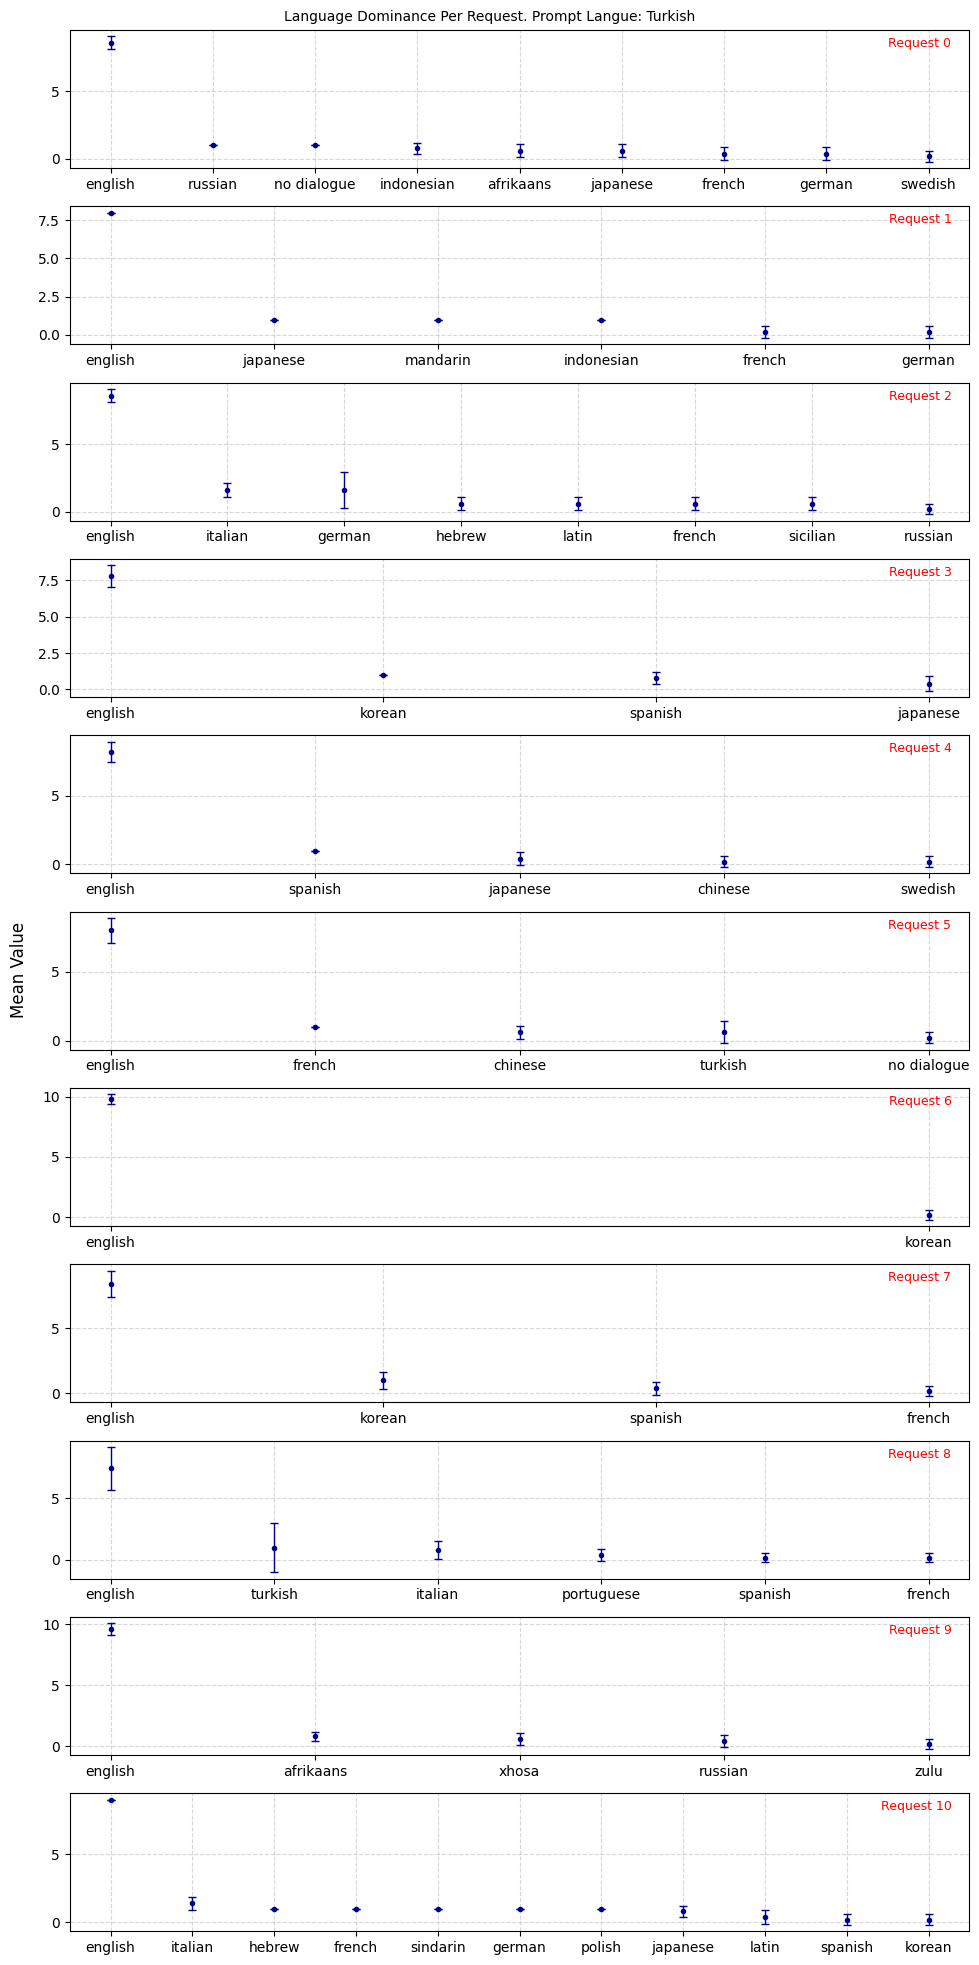

In [ ]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(10, 20))

prompt_language = "turkish"
request_numbers = list(range(11))  # Request numbers from 0 to 10
for i, req_num in enumerate(request_numbers):
    # Get mean and std dictionaries
    means = prompt_language2req2langs_means[prompt_language][i]
    stds = prompt_language2req2langs_stds[prompt_language][i]

    # Align both on common languages
    langs = list(means.keys())
    mean_vals = list(means.values())
    std_vals = list(stds.values())

    # sort them based on mean values
    sorted_indices = np.argsort(list(mean_vals))[::-1]  # Sort in descending order
    langs = [langs[i] for i in sorted_indices] 
    mean_vals = [mean_vals[i] for i in sorted_indices]
    std_vals = [std_vals[i] for i in sorted_indices]


    axs[i].errorbar(langs, mean_vals, yerr=std_vals, fmt='o', capsize=3, color='darkblue', elinewidth=1, markeredgewidth=1, markersize=3)
    # set grid true
    axs[i].grid(True, linestyle='--', alpha=0.5)

    # add request number inside the plot top right corner
    axs[i].text(0.98, 0.95, f"Request {req_num}", transform=axs[i].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right', color='red')


fig.supylabel("Mean Value")
fig.suptitle(f"Language Dominance Per Request. Prompt Langue: {prompt_language.title()}", fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.97)  # Adjust top to make room for the suptitle
plt.show()

# V2

In [2]:
v2_path = "./*_recommendation_output_v2/*/*.json"


prompt_language2experiments = defaultdict(lambda : defaultdict(dict))

for fname in glob.glob(v2_path):
    prompt_language = fname.split("/")[1].split("_")[0]
    experiment_name = int(fname.split("/")[-2].split("_")[1])
    request_number = int(fname.split("/")[-1].split(".")[0].split("_")[-1])
    with open(fname, "r") as f:
        data = json.load(f)
        prompt_language2experiments[prompt_language][experiment_name][request_number] = data

In [7]:
prompt_language2counties = dict()
prompt_language2languages = dict()

for prompt_language in prompt_language2experiments:
    request2exp2countries = defaultdict(list)
    request2exp2languages = defaultdict(list)


    for request_number in range(0, 11): # This sets request type static
        req_langs = []
        req_countries = []
        for experiment_number in range(0, 5): # This sets experiment number static
            results = prompt_language2experiments[prompt_language][experiment_number][request_number]
            rec_langs = []
            rec_countries = []
            for rec in results["recommendations"]:
                country = rec["country"]
                lang =  re.split(r'[،,\;\|\:\/]', rec["language"]) 
                lang = list(set([normalize_lang(l.strip()).lower() for l in lang if l.strip()]))
                countries = re.split(r'[،,\;\|\:\/]', country)
                countries = list(set([normalize_country(c.strip()).lower() for c in countries if c.strip()]))
                
                rec_countries.append(countries)
                rec_langs.append(lang)
            
            req_langs.append(rec_langs)
            req_countries.append(rec_countries)

        request2exp2countries[request_number] = req_countries
        request2exp2languages[request_number] = req_langs
    
    prompt_language2counties[prompt_language] = request2exp2countries
    prompt_language2languages[prompt_language] = request2exp2languages

In [8]:
# prompt lang 2 request 2 experiment 2 countries

prompt_language2req2langs_means = defaultdict(lambda: defaultdict(lambda : defaultdict(float)))
prompt_language2req2langs_stds = defaultdict(lambda: defaultdict(lambda : defaultdict(float)))

for prompt_language in prompt_language2counties:
    for req_number in range(0, 11):
        # There are five experimtns, I want to count the language for each request
        exps = prompt_language2languages[prompt_language][req_number]   
        counts = []
        all_langs = set()
        for exp in exps:
            lang_count = defaultdict(int)
            for lang in exp:
                for l in lang:
                    lang_count[l] += 1
                    all_langs.add(l)
            counts.append(lang_count)
        
        for lang in all_langs:
            lang_counts = [c.get(lang, 0) for c in counts]
            mean = np.mean(lang_counts)
            std = np.std(lang_counts)
            print(f"Language: {lang}, Mean: {mean}, Std: {std}")
            prompt_language2req2langs_means[prompt_language][req_number][lang] = mean
            prompt_language2req2langs_stds[prompt_language][req_number][lang] = std

Language: romanian, Mean: 1.0, Std: 0.0
Language: french, Mean: 1.6, Std: 1.019803902718557
Language: portuguese, Mean: 0.2, Std: 0.4
Language: mandarin, Mean: 0.4, Std: 0.48989794855663565
Language: no dialogue, Mean: 0.8, Std: 0.4
Language: arabic, Mean: 1.2, Std: 0.4
Language: english, Mean: 3.6, Std: 1.019803902718557
Language: macedonian, Mean: 1.0, Std: 0.0
Language: indonesian, Mean: 1.0, Std: 0.0
Language: russian, Mean: 0.2, Std: 0.4
Language: italian, Mean: 0.2, Std: 0.4
Language: french, Mean: 0.6, Std: 0.48989794855663565
Language: mandarin, Mean: 1.0, Std: 0.0
Language: german, Mean: 0.2, Std: 0.4000000000000001
Language: japanese, Mean: 1.2, Std: 0.4
Language: english, Mean: 4.0, Std: 0.6324555320336759
Language: indonesian, Mean: 1.0, Std: 0.0
Language: cantonese, Mean: 2.0, Std: 0.6324555320336759
Language: persian, Mean: 0.8, Std: 0.4
Language: french, Mean: 2.0, Std: 0.6324555320336759
Language: swedish, Mean: 0.8, Std: 1.1661903789690602
Language: spanish, Mean: 0.8,

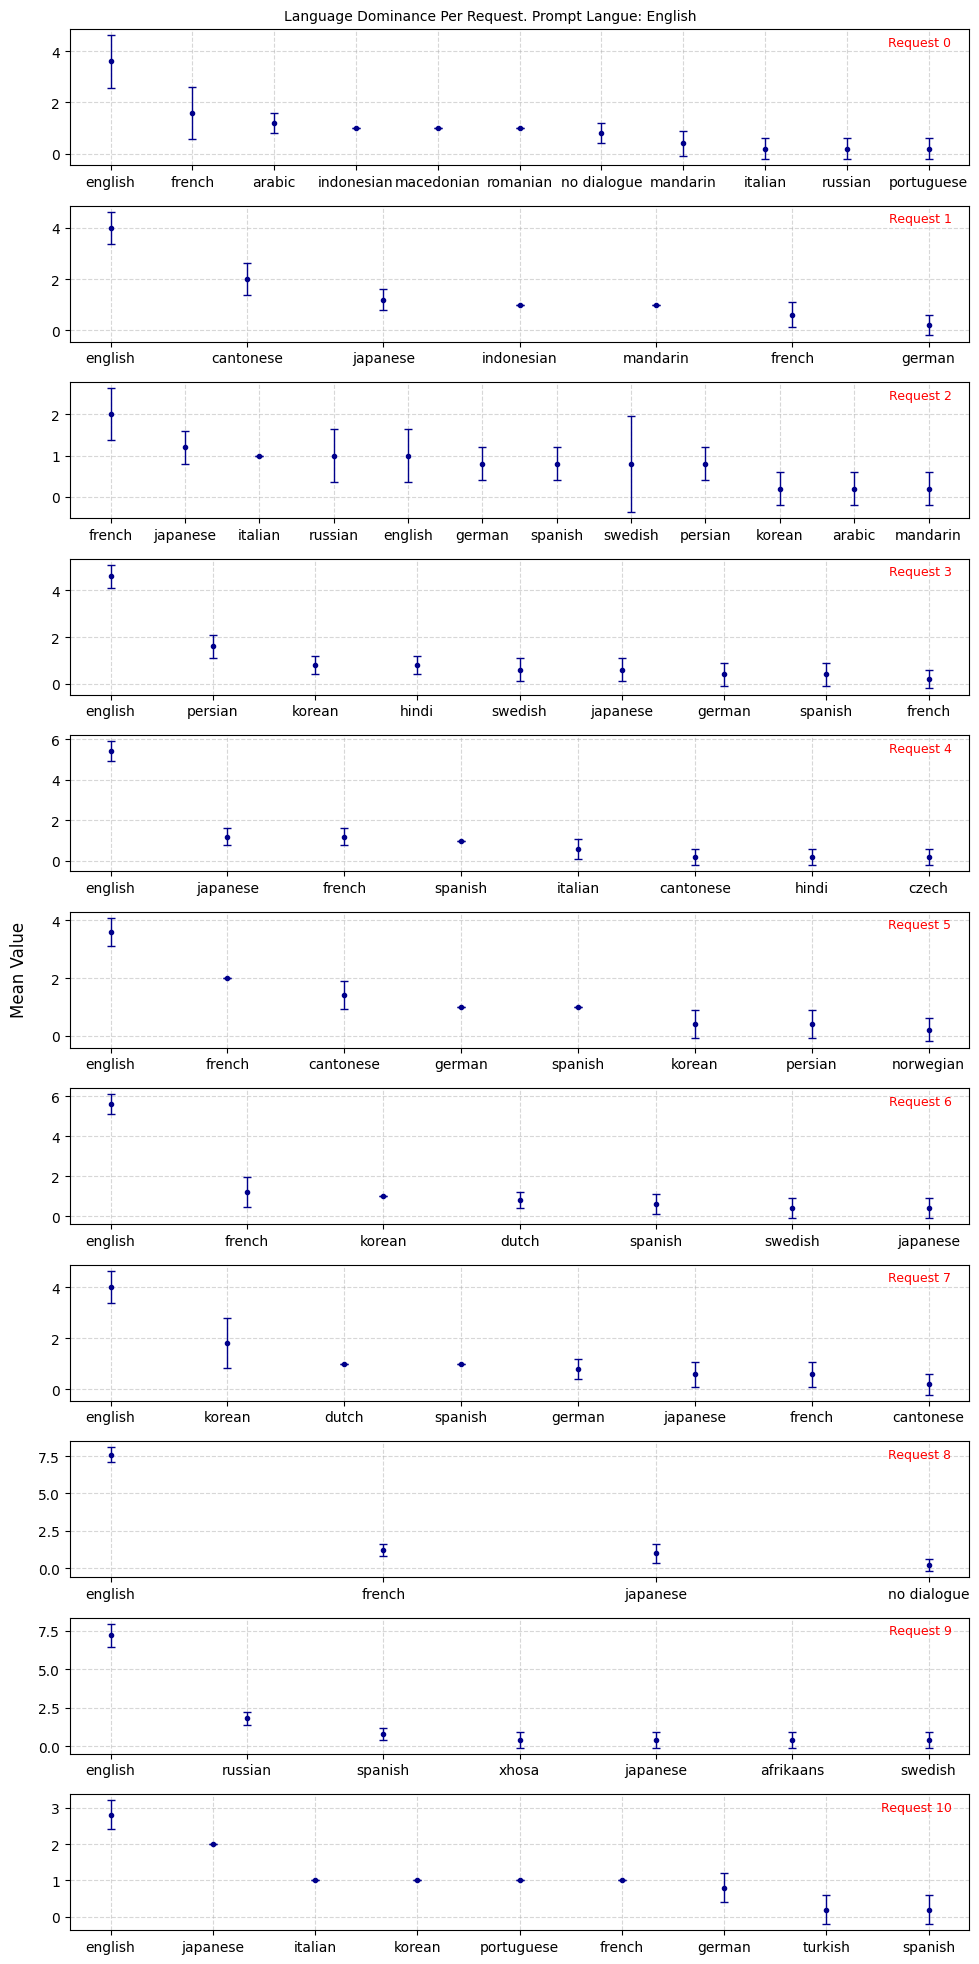

In [9]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(10, 20))

prompt_language = "english"
request_numbers = list(range(11))  # Request numbers from 0 to 10
for i, req_num in enumerate(request_numbers):
    # Get mean and std dictionaries
    means = prompt_language2req2langs_means[prompt_language][i]
    stds = prompt_language2req2langs_stds[prompt_language][i]

    # Align both on common languages
    langs = list(means.keys())
    mean_vals = list(means.values())
    std_vals = list(stds.values())

    # sort them based on mean values
    sorted_indices = np.argsort(list(mean_vals))[::-1]  # Sort in descending order
    langs = [langs[i] for i in sorted_indices] 
    mean_vals = [mean_vals[i] for i in sorted_indices]
    std_vals = [std_vals[i] for i in sorted_indices]


    axs[i].errorbar(langs, mean_vals, yerr=std_vals, fmt='o', capsize=3, color='darkblue', elinewidth=1, markeredgewidth=1, markersize=3)
    # set grid true
    axs[i].grid(True, linestyle='--', alpha=0.5)

    # add request number inside the plot top right corner
    axs[i].text(0.98, 0.95, f"Request {req_num}", transform=axs[i].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right', color='red')


fig.supylabel("Mean Value")
fig.suptitle(f"Language Dominance Per Request. Prompt Langue: {prompt_language.title()}", fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.97)  # Adjust top to make room for the suptitle
plt.show()

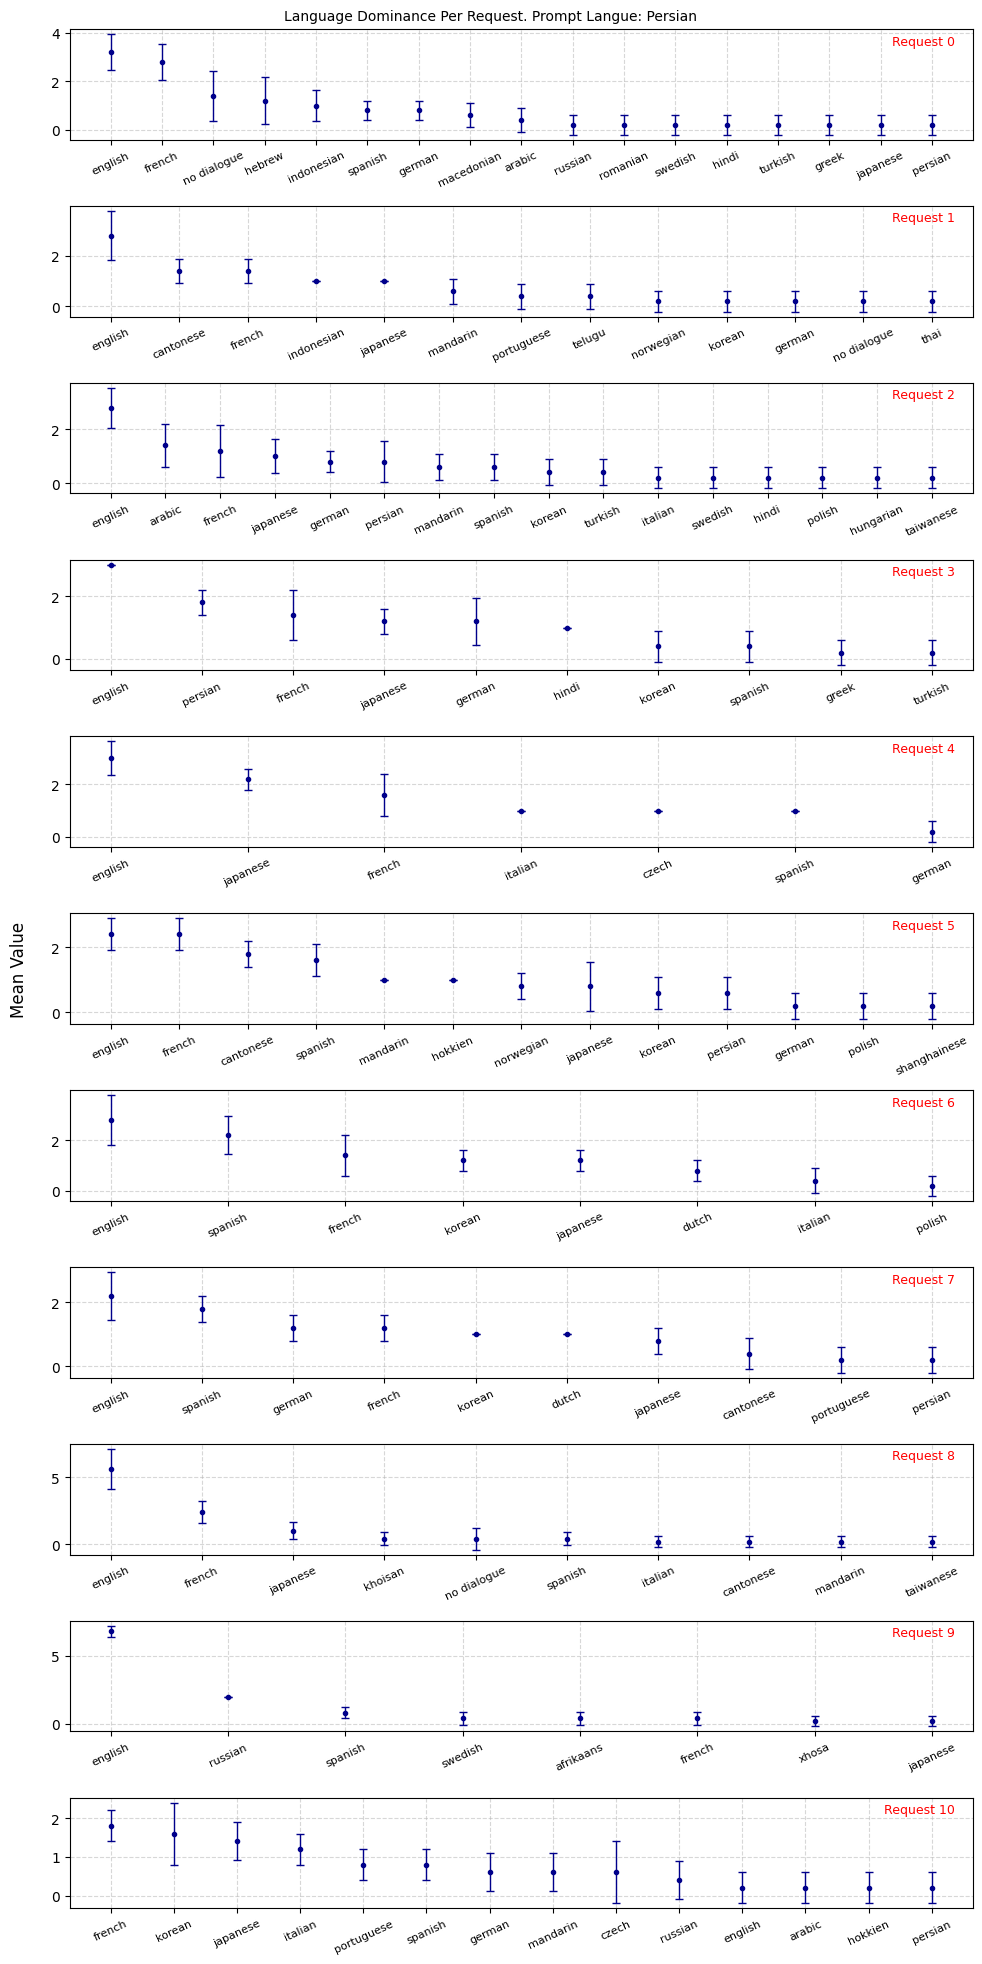

In [15]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(10, 20))

prompt_language = "persian"
request_numbers = list(range(11))  # Request numbers from 0 to 10
for i, req_num in enumerate(request_numbers):
    # Get mean and std dictionaries
    means = prompt_language2req2langs_means[prompt_language][i]
    stds = prompt_language2req2langs_stds[prompt_language][i]

    # Align both on common languages
    langs = list(means.keys())
    mean_vals = list(means.values())
    std_vals = list(stds.values())

    # sort them based on mean values
    sorted_indices = np.argsort(list(mean_vals))[::-1]  # Sort in descending order
    langs = [langs[i] for i in sorted_indices] 
    mean_vals = [mean_vals[i] for i in sorted_indices]
    std_vals = [std_vals[i] for i in sorted_indices]


    axs[i].errorbar(langs, mean_vals, yerr=std_vals, fmt='o', capsize=3, color='darkblue', elinewidth=1, markeredgewidth=1, markersize=3)
    # set grid true
    axs[i].grid(True, linestyle='--', alpha=0.5)

    # add request number inside the plot top right corner
    axs[i].text(0.98, 0.95, f"Request {req_num}", transform=axs[i].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right', color='red')
    
    # rotate x-ticks
    axs[i].tick_params(axis='x', rotation=25, labelsize=8)

fig.supylabel("Mean Value")
fig.suptitle(f"Language Dominance Per Request. Prompt Langue: {prompt_language.title()}", fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.97)  # Adjust top to make room for the suptitle
plt.show()

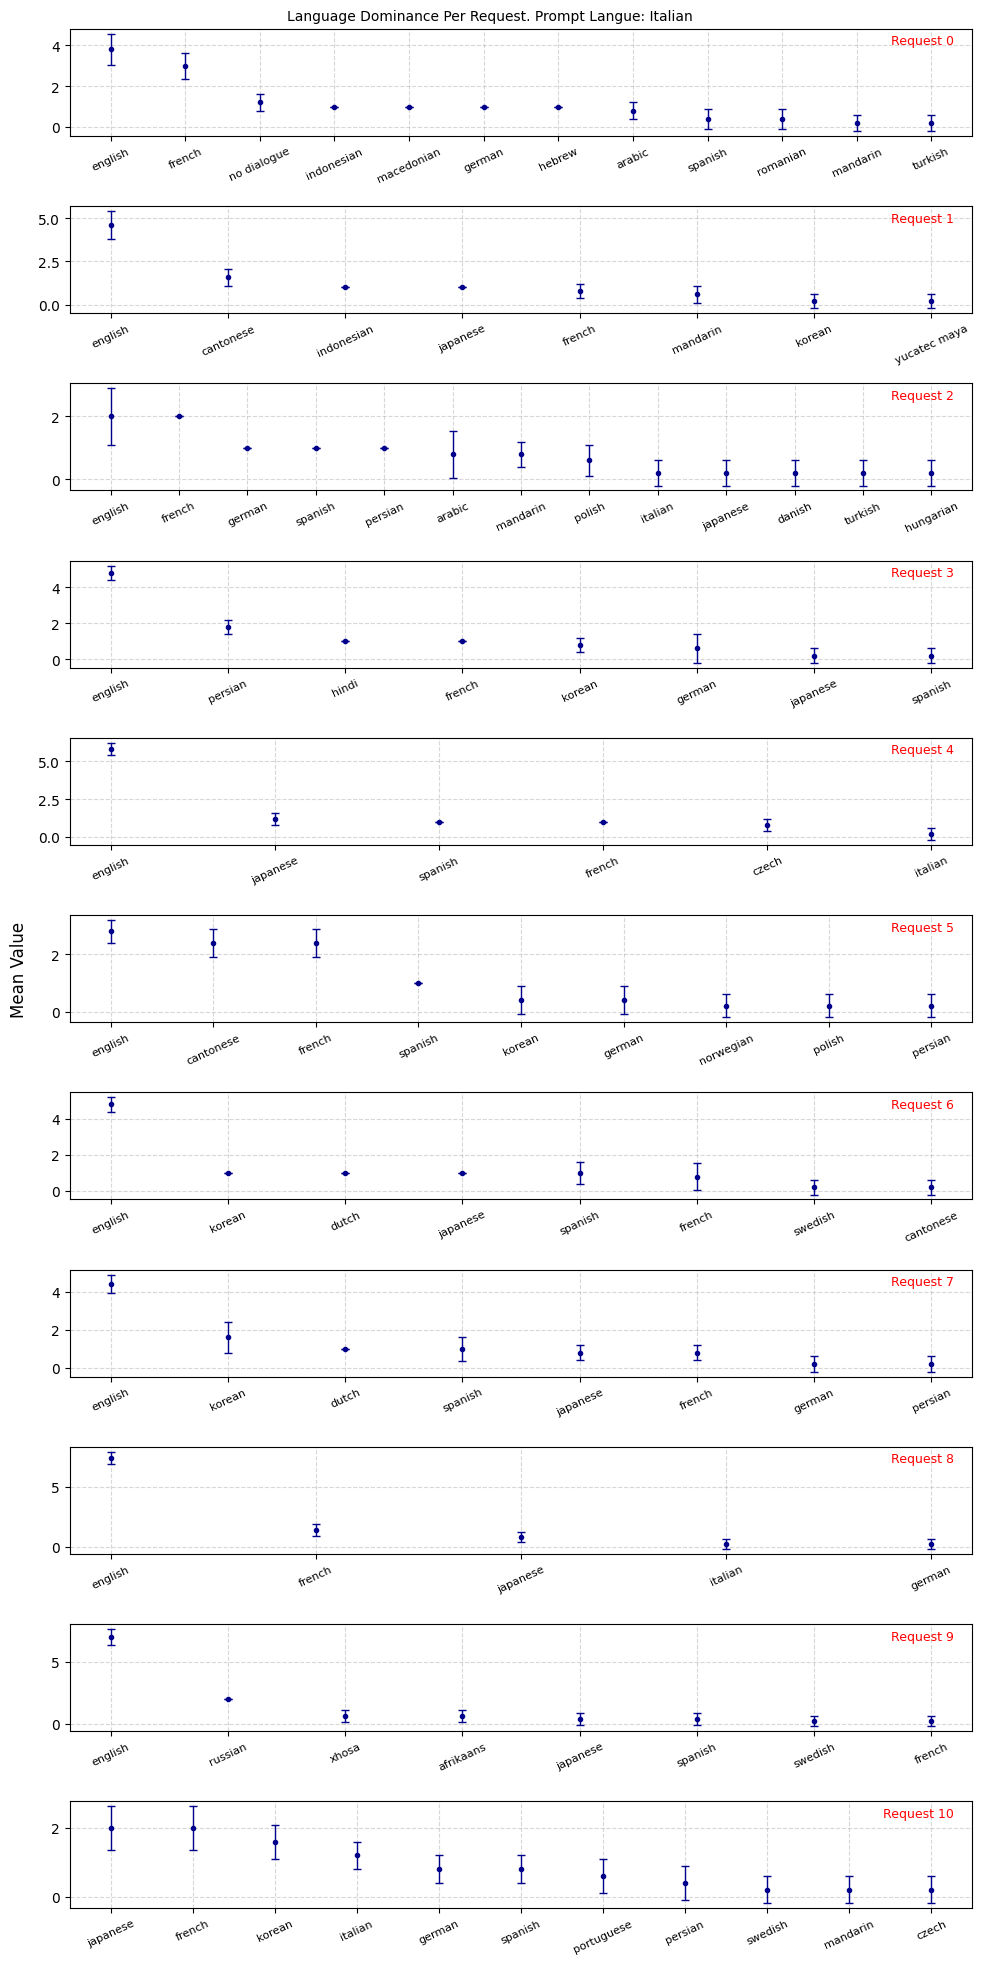

In [16]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(10, 20))

prompt_language = "italian"
request_numbers = list(range(11))  # Request numbers from 0 to 10
for i, req_num in enumerate(request_numbers):
    # Get mean and std dictionaries
    means = prompt_language2req2langs_means[prompt_language][i]
    stds = prompt_language2req2langs_stds[prompt_language][i]

    # Align both on common languages
    langs = list(means.keys())
    mean_vals = list(means.values())
    std_vals = list(stds.values())

    # sort them based on mean values
    sorted_indices = np.argsort(list(mean_vals))[::-1]  # Sort in descending order
    langs = [langs[i] for i in sorted_indices] 
    mean_vals = [mean_vals[i] for i in sorted_indices]
    std_vals = [std_vals[i] for i in sorted_indices]


    axs[i].errorbar(langs, mean_vals, yerr=std_vals, fmt='o', capsize=3, color='darkblue', elinewidth=1, markeredgewidth=1, markersize=3)
    # set grid true
    axs[i].grid(True, linestyle='--', alpha=0.5)

    # add request number inside the plot top right corner
    axs[i].text(0.98, 0.95, f"Request {req_num}", transform=axs[i].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right', color='red')
    
    # rotate x-ticks
    axs[i].tick_params(axis='x', rotation=25, labelsize=8)

fig.supylabel("Mean Value")
fig.suptitle(f"Language Dominance Per Request. Prompt Langue: {prompt_language.title()}", fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.97)  # Adjust top to make room for the suptitle
plt.show()

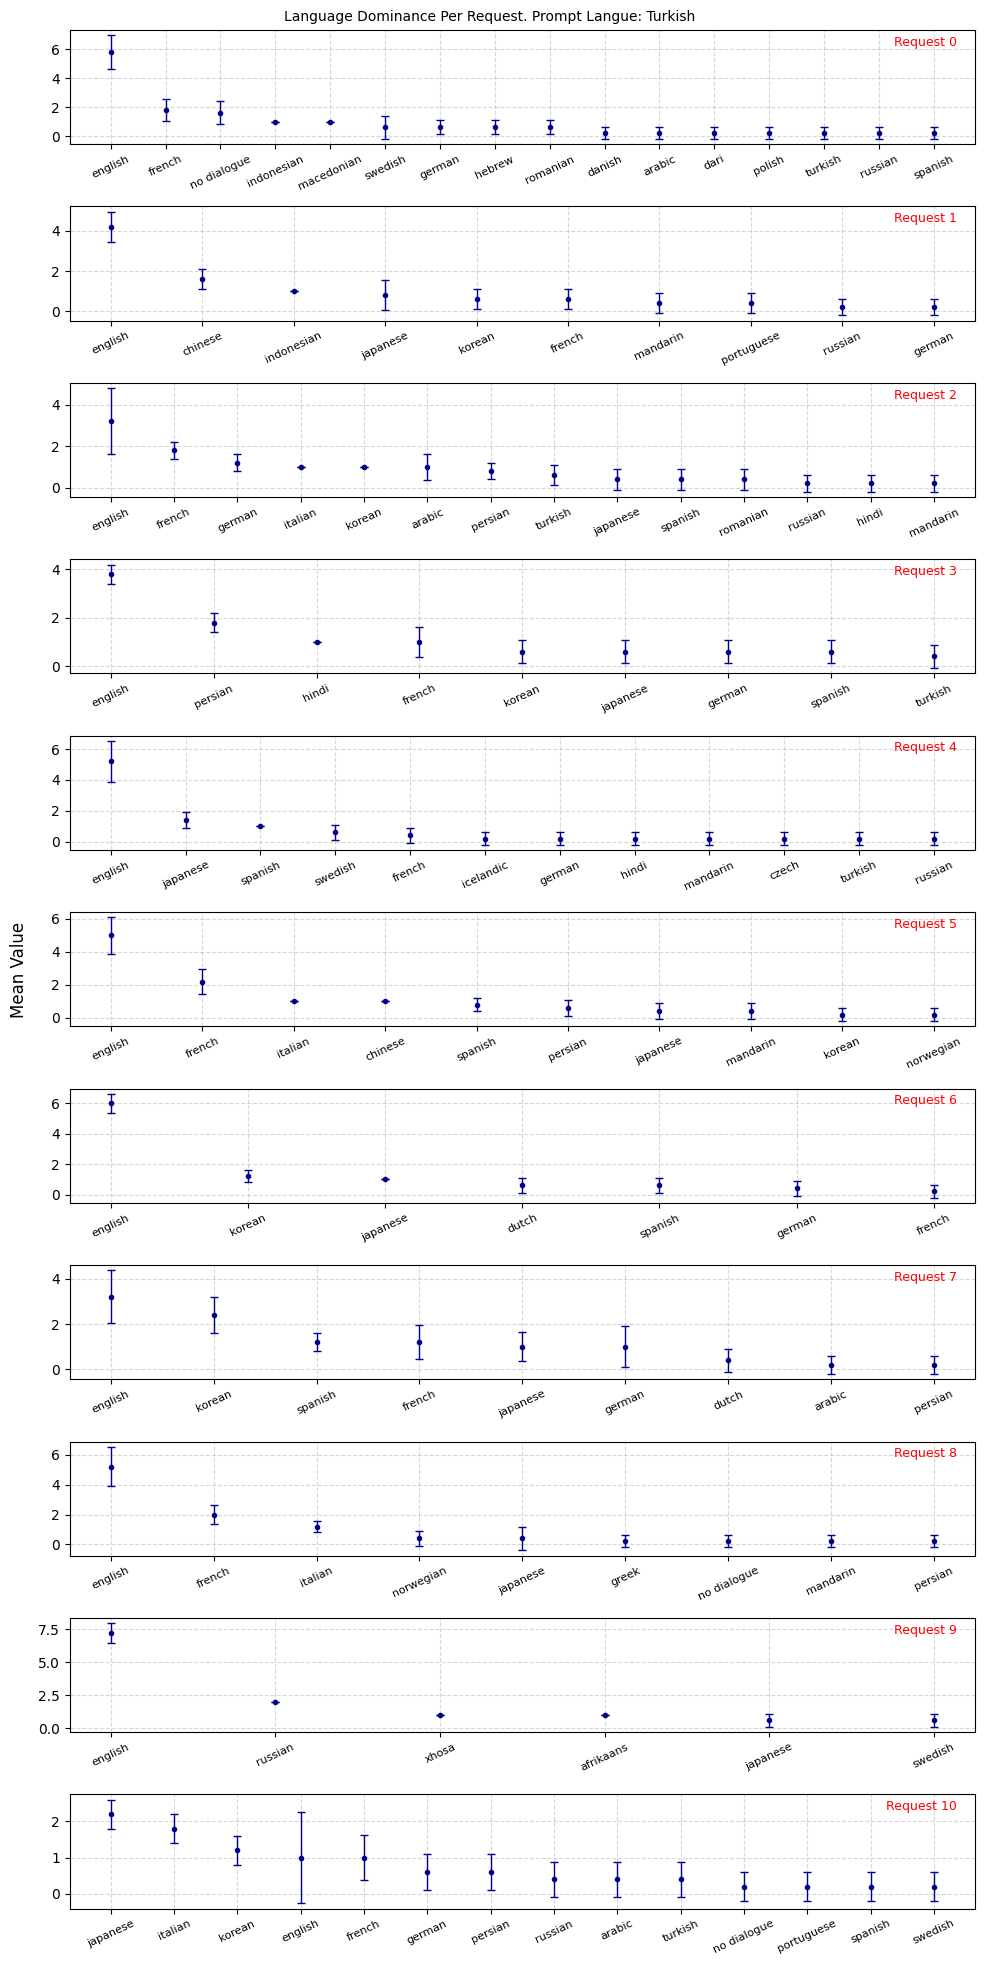

In [17]:
fig, axs = plt.subplots(nrows=11, ncols=1, figsize=(10, 20))

prompt_language = "turkish"
request_numbers = list(range(11))  # Request numbers from 0 to 10
for i, req_num in enumerate(request_numbers):
    # Get mean and std dictionaries
    means = prompt_language2req2langs_means[prompt_language][i]
    stds = prompt_language2req2langs_stds[prompt_language][i]

    # Align both on common languages
    langs = list(means.keys())
    mean_vals = list(means.values())
    std_vals = list(stds.values())

    # sort them based on mean values
    sorted_indices = np.argsort(list(mean_vals))[::-1]  # Sort in descending order
    langs = [langs[i] for i in sorted_indices] 
    mean_vals = [mean_vals[i] for i in sorted_indices]
    std_vals = [std_vals[i] for i in sorted_indices]


    axs[i].errorbar(langs, mean_vals, yerr=std_vals, fmt='o', capsize=3, color='darkblue', elinewidth=1, markeredgewidth=1, markersize=3)
    # set grid true
    axs[i].grid(True, linestyle='--', alpha=0.5)

    # add request number inside the plot top right corner
    axs[i].text(0.98, 0.95, f"Request {req_num}", transform=axs[i].transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right', color='red')
    
    # rotate x-ticks
    axs[i].tick_params(axis='x', rotation=25, labelsize=8)

fig.supylabel("Mean Value")
fig.suptitle(f"Language Dominance Per Request. Prompt Langue: {prompt_language.title()}", fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.97)  # Adjust top to make room for the suptitle
plt.show()